In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Outline

- Prepare data
    - only look at cars produced 2000-2016
    - Only look at Hatchback, Sedan, and Jeep
    
- Calculate 90% confidence interval for average price of car. Use sample of 250, 500, 1000
- Create three different subsets according to `category`
- Compare and contrast `price` across the three subsets
- Perform a two-tailed t-test on `price` according to `category`
    - State what a Type I and Type II error would be in the context of this experiment.
- Perform a one-tailed t-test on `price` according to `category`
    - State what a Type I and Type II error would be in the context of this experiment.

#### Level Up
- Calculate 85% bootstrapped confidence interval
- Bootstrapped significance test

## Prepare Data

The csv file we want is stored in the `data` folder as `car_price.csv`. Read the file into a DataFrame, display the first five rows, and check the type of each column.

Filter the DataFrame to meet the following criteria:
- Cars were produced between 2000 and 2016
- The `category` of vehicle belongs to the set `{"Jeep", "Hatchback", "Sedan"}`

In [2]:
df = pd.read_csv('./data/car_price.csv')
df.head()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17377 non-null  int64  
 1   price             17377 non-null  int64  
 2   levy              17377 non-null  object 
 3   manufacturer      17377 non-null  object 
 4   model             17377 non-null  object 
 5   prod._year        17377 non-null  int64  
 6   category          17377 non-null  object 
 7   leather_interior  17377 non-null  object 
 8   fuel_type         17377 non-null  object 
 9   engine_volume     17377 non-null  object 
 10  mileage           17377 non-null  object 
 11  cylinders         17377 non-null  float64
 12  gear_box_type     17377 non-null  object 
 13  drive_wheels      17377 non-null  object 
 14  doors             17377 non-null  object 
 15  wheel             17377 non-null  object 
 16  color             17377 non-null  object

In [4]:
# Cars produced 2000-2016
df = df.loc[(df['prod._year'] >= 2000) & (df['prod._year'] <= 2016)]

In [5]:
# Cars belong to appropriate category set
df = df.loc[df['category'].isin({"Jeep", "Hatchback", "Sedan"})]

## Confidence Interval

Calculate a 90% confidence interval around the mean `price` using the following sample sizes:
- 250
- 500
- 1000

Compare the range values for each sample size

**Note**: Need to set `random_state` when taking sample or sample will be different each time. Also why Bootstrap CI is more robust.

In [6]:
def calculate_ci(sample, confidence_level):
    
    # Sample mean
    sample_mean = sample.mean()

    # Sample std
    sample_std = sample.std()

    # Sample size
    sample_size = len(sample)

    # Standard Error
    se = sample_std/np.sqrt(sample_size)
    
    # Calculate and return confidence interval
    return stats.t.interval(alpha=confidence_level, loc=sample_mean, scale=se, df=sample_size-1)

In [7]:
# Sample size 250
sample_250 = df['price'].sample(n=250, random_state=42)

In [8]:
print('90% CI for sample size 250: ', calculate_ci(sample_250, .9))

90% CI for sample size 250:  (13591.830821984751, 16009.633178015249)


In [9]:
# Sample size 500
sample_500 = df['price'].sample(n=500, random_state=42)

In [10]:
print('90% CI for sample size 500: ', calculate_ci(sample_500, .9))

90% CI for sample size 500:  (13871.715451379716, 15504.120548620283)


In [11]:
# Sample size 1000
sample_1000 = df['price'].sample(n=1000, random_state=42)

In [12]:
print('90% CI for sample size 1000: ', calculate_ci(sample_1000, .9))

90% CI for sample size 1000:  (14315.639858690143, 15510.222141309858)


## Create three different subsets for `category`

In [13]:
df['category'].value_counts()

Sedan        6976
Jeep         4018
Hatchback    2384
Name: category, dtype: int64

Create three subset DataFrames, one for each `category` type

In [14]:
sedan = df.loc[df['category'] == 'Sedan']['price']
jeep = df.loc[df['category'] == 'Jeep']['price']
hatchback = df.loc[df['category'] == 'Hatchback']['price']

In [15]:
print('Length Sedan: ', len(sedan))
print('Length Jeep: ', len(jeep))
print('Length Hatchback: ', len(hatchback))

Length Sedan:  6976
Length Jeep:  4018
Length Hatchback:  2384


## Compare `price` across three subsets

In [16]:
df.groupby('category').mean()['price']

category
Hatchback    12079.050755
Jeep         18479.090841
Sedan        13378.490109
Name: price, dtype: float64

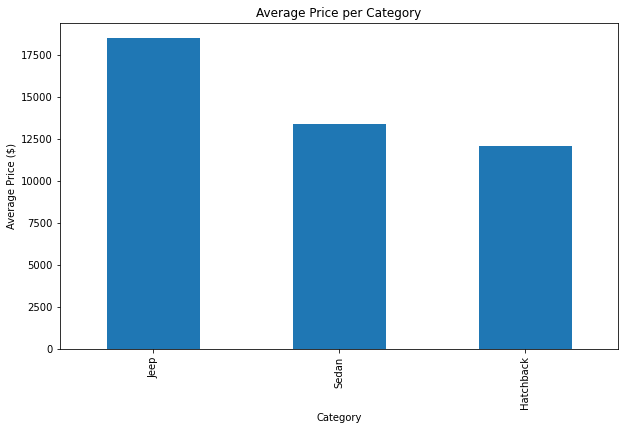

In [17]:
df.groupby('category').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6)).set(
    title='Average Price per Category',
    xlabel='Category',
    ylabel='Average Price ($)'
);

Would prefer to see distributions across categories vs aggregate statistics

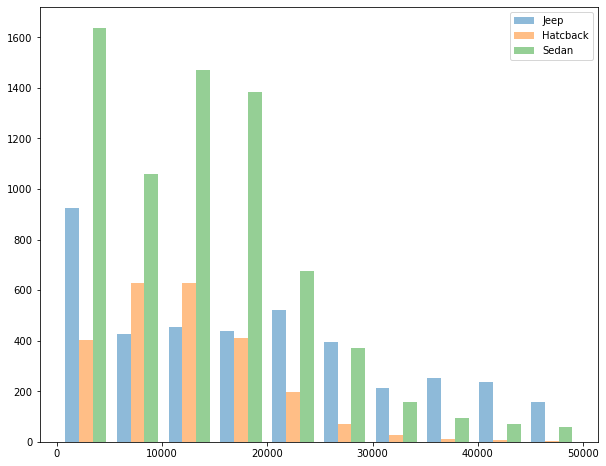

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x=[jeep, hatchback, sedan], label=['Jeep', 'Hatcback', 'Sedan'], alpha=.5)

ax.legend();

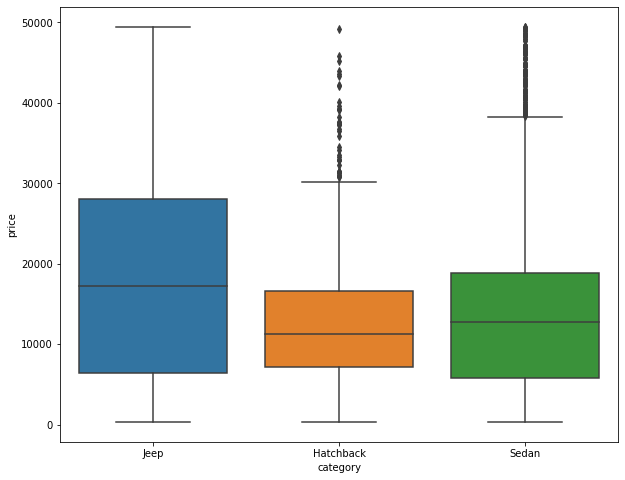

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='category', y='price');

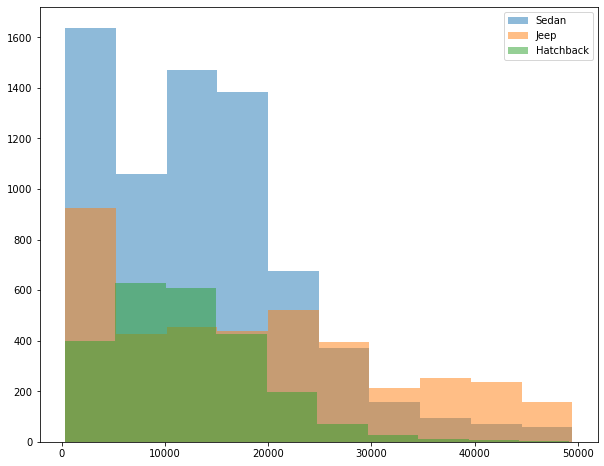

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x=sedan, label='Sedan', alpha=.5)
ax.hist(x=jeep, label='Jeep', alpha=.5)
ax.hist(x=hatchback, label='Hatchback', alpha=.5)

ax.legend();

## Hypothesis Testing

The output of a t-test in the scipy stats library (so, `ttest_1samp`, `ttest_rel`, `ttest_ind`, etc) is a tuple with two pieces:
- the test statistic
- the p-value

I recommend you use the `alternative` argument in the t-test functions to tell it what kind of test you're running: 
- `'two-sided'` tells the stats library you're running a two-tailed test
- `'less'` tells the stats library you're running a left tailed test
- `'greater'` tells the stats library you're running a right tailed test

### Complete the followoing for each example below:
- Define the null an alternative hypothesis
- Identify the appropriate type of test to use (use alpha of .05)
- State what a Type I and Type II error would be in this context
- Take a sample of 250 from each populution
- Run the test and interpret the results


### Perform a two-tailed t-test on `price` according to `category`

The hardest part is setting it up!

- Null: The average price of a Sedan is the same than the average price of a Hatchback.
- Alternative: The average price of a Sedan is different than the average price Hatchback.

- Type I:
- Type II:

We will be comparing two different samples so we need to perform an indepedent, 2-sample t-test.

In [73]:
sedan_sample = sedan.sample(n=250, random_state=42)
hatchback_sample = hatchback.sample(n=250, random_state=42)

Check variance of each sample

In [74]:
print("Variance of Sedan sample: ", sedan_sample.var())
print("Variance of hatchback sample: ", hatchback_sample.var())

Variance of Sedan sample:  102840711.43235345
Variance of hatchback sample:  56327898.591823295


Different variances in each sample. Set `equal_var` to false

In [75]:
# RUN TEST
stats.ttest_ind(sedan_sample, hatchback_sample, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=1.07402906245868, pvalue=0.2833741671202797)

The p-value is greater than our signifiance level of .05, so we fail to reject the null hypothesis. 

### Perform a one-tailed t-test on `price` according to `category`

- Null: The average price of a Jeep is less than or equal to the average price of a Sedan
- Alternative: The average price of a Jeep is greater than the average price of a Sedan

- Type I:
- Type II:

Once again, running a 2 sample independent t-test

In [76]:
jeep_sample = jeep.sample(n=250, random_state=42)
sedan_sample = sedan.sample(n=250, random_state=42)

Check variance of each sample

In [77]:
print("Variance of Sedan sample: ", sedan_sample.var())
print("Variance of hatchback sample: ", jeep_sample.var())

Variance of Sedan sample:  102840711.43235345
Variance of hatchback sample:  196295569.33476296


In [78]:
# RUN TEST
stats.ttest_ind(jeep_sample, sedan_sample, equal_var=False, alternative='greater')

Ttest_indResult(statistic=6.059372571849608, pvalue=1.4370469143939956e-09)

The p-value is well below significance level of .05 so we reject null hypothesis that average price of Jeep is less than or equal to average price of Sedan.

# Level Up

## Calculate 80% bootstrapped confidence interval around mean Sedan price

- Take a sample of 1000 from Sedan population
- Take a bootstrap sample from our original sample with n=1000
- Calculate the mean of the bootstrap sample
- Repeat this process 10,000 times storing the mean of each bootstrap sample in a list.
- Plot a distribution of the bootstrap sample means to ensure it reflects a normal distribution
- Take a 90% confidence interval of the bootstrap sample means

[Text(0.5, 1.0, 'Distribution of Sedan Price (Pop)')]

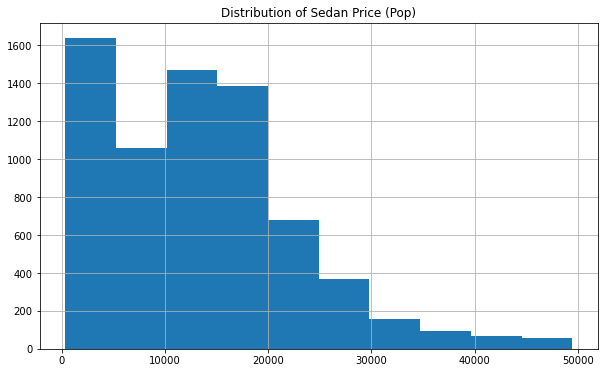

In [82]:
sedan.hist(figsize=(10,6)).set(title='Distribution of Sedan Price (Pop)')

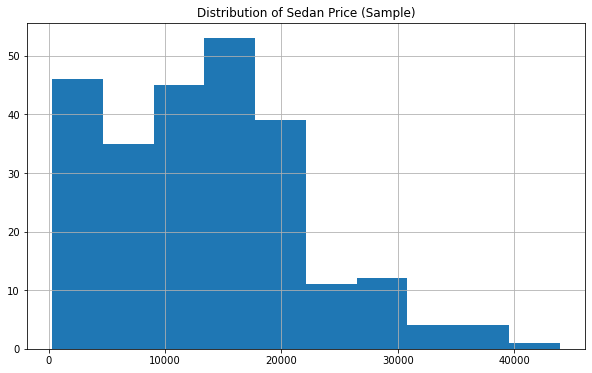

In [138]:
main_sample = sedan.sample(n=250)
main_sample.hist(figsize=(10,6)).set(title='Distribution of Sedan Price (Sample)');

In [159]:
bootstrap_means = []
for _ in range(10000):
    bt_sample = main_sample.sample(n=250, replace=True)
    bt_mean = bt_sample.mean()
    bootstrap_means.append(bt_mean)

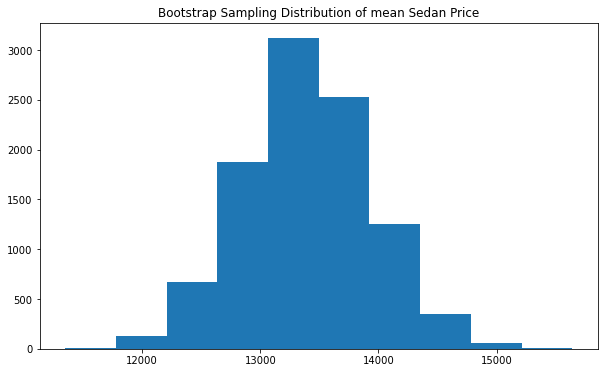

In [153]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bootstrap_means)
ax.set_title('Bootstrap Sampling Distribution of mean Sedan Price');

In [154]:
sedan.mean()

13378.490108944954

For an x% confidence interval, trim [(1 – [x/100]) / 2]%

In [170]:
np.percentile(sorted(bootstrap_means), [10, 90])

array([12351.1856, 14456.2029])

In [169]:
stats.t.interval(alpha=.8,
                 loc=np.mean(bootstrap_means),
                 scale=np.std(bootstrap_means)/np.sqrt(len(bootstrap_means)),
                 df=len(bootstrap_means)-1)

(13403.587359907973, 13417.390840092028)